In [1]:
import numpy as np
import os
import torch
import tensorflow as tf
import keras
import random
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Dense

In [2]:
imgL = range(5121)
imgH = 200
imgW = 200
imgC = 1

list = []
for n in imgL:
    list.append(n)
random.shuffle(list)

print(list)

[4471, 1489, 2347, 1189, 4311, 378, 4151, 4621, 4342, 3141, 4128, 4869, 1912, 2952, 2222, 1440, 2593, 3775, 2504, 3896, 2052, 3421, 4944, 1691, 2617, 120, 948, 1580, 2262, 4777, 1336, 88, 487, 2499, 122, 3023, 966, 240, 4127, 5042, 1899, 4258, 1864, 2314, 5085, 2265, 3351, 2258, 1393, 2862, 2200, 355, 4674, 1670, 832, 4073, 4193, 4301, 1880, 2155, 303, 3933, 4382, 2678, 4500, 4668, 992, 2275, 2102, 1499, 2788, 2339, 1754, 2174, 3038, 1765, 1859, 1809, 3398, 408, 3800, 3045, 1255, 1929, 2576, 4641, 743, 2942, 1585, 2429, 2369, 389, 879, 4893, 3005, 2230, 4865, 2414, 493, 4819, 63, 1223, 659, 2016, 2805, 3863, 501, 4333, 4396, 453, 1431, 1111, 4914, 1448, 1170, 4702, 2355, 2721, 3279, 340, 3176, 4123, 1250, 4514, 3947, 155, 4673, 2913, 967, 4048, 1216, 1344, 1712, 2346, 1412, 2794, 1274, 1443, 2452, 2519, 2946, 1522, 4763, 5071, 996, 694, 2066, 3305, 104, 245, 1296, 944, 465, 475, 1904, 1451, 3644, 3104, 4650, 1446, 1528, 887, 3771, 845, 3174, 1533, 1005, 1381, 2401, 4852, 2048, 3041, 32

MildDemented
ModerateDemented
NonDemented
VeryMildDemented
C:\Users\ebudy\ADDataset\adSet\train\NonDemented\nonDem1656.jpg
C:\Users\ebudy\ADDataset\adSet\train\VeryMildDemented\verymildDem540.jpg
[0 1 0 0]


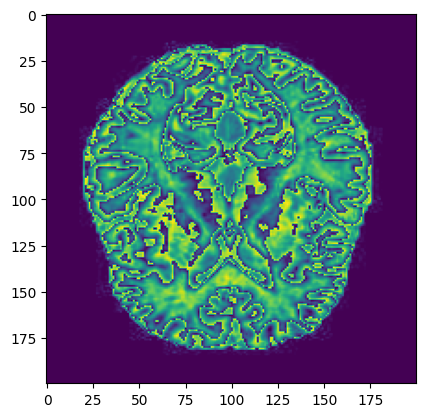

In [3]:
trainPath = r"C:\Users\ebudy\ADDataset\adSet\train"
testPath = r"C:\Users\ebudy\ADDataset\adSet\test"

trainXList = np.zeros((5121, imgH, imgW), dtype=np.uint8)
trainYList = np.zeros((5121, 4), dtype=int)
tempXList = np.zeros((5121, imgH, imgW, 3), dtype=np.uint8)
testList = np.zeros((1279, imgH, imgW), dtype=np.uint8)
tempL = np.zeros((1, imgH, imgW, 1), dtype=np.uint8)
fullList = []

for folder, n in zip(os.listdir(trainPath), imgL):
    print(folder)
    for img in os.listdir(trainPath + "\\" + folder):
        fullList.append(trainPath + "\\" + folder + "\\" + img)         

print(fullList[1500])
        
for im, n in zip(fullList, list):
    if n==150:
        print(im)
    if "Non" in im:
        trainYList[n][0] = 1
    elif "Very" in im:
        trainYList[n][1] = 1
    elif "Mild" in im:
        trainYList[n][2] = 1
    elif "Moderate" in im:
        trainYList[n][3] = 1
    im = cv2.imread(im)
    im = cv2.resize(im, (200, 200))
    tempXList[n] = im
    l0, l1, l2 = cv2.split(tempXList[n])
    for x in range(0, 200):
        tempL = (l0 + l1 + l2)/3
        trainXList[n] = tempL
        
print(trainYList[150])
plt.imshow(trainXList[150])

MildDemented
ModerateDemented
NonDemented
VeryMildDemented
[0 0 1 0]


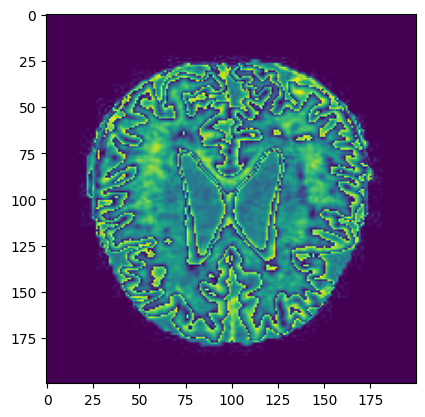

In [4]:
temptestList = np.zeros((1279, imgH, imgW, 3), dtype=np.uint8)
testYList = np.zeros((1279, 4), dtype=int)
fullList = []

for folder, n in zip(os.listdir(testPath), range(1279)):
    print(folder)
    for img in os.listdir(testPath + "\\" + folder):
        fullList.append(testPath + "\\" + folder + "\\" + img)
        
for im, n in zip(fullList, range(1279)):
    if "Non" in im:
        testYList[n][0] = 1
    elif "Very" in im:
        testYList[n][1] = 1
    elif "Mild" in im:
        testYList[n][2] = 1
    elif "Moderate" in im:
        testYList[n][3] = 1
    im = cv2.imread(im)
    im = cv2.resize(im, (200, 200))
    temptestList[n] = im
    l0, l1, l2 = cv2.split(temptestList[n])
    for x in range(0, 200):
        tempL = (l0 + l1 + l2)/3
        testList[n] = tempL
        
print(testYList[150])
plt.imshow(testList[150])

In [5]:
XList = np.zeros((5121, 40000), dtype=np.uint8)
testXList = np.zeros((1279, 40000), dtype=np.uint8)

for item, n in zip(trainXList, list):
    XList[n] = item.flatten()
    XList[n] = XList[n]/255
    
for item, n in zip(testList, range(1279)):
    testXList[n] = item.flatten()
    testXList[n] = testXList[n]/255

In [6]:
kerasMod = tf.keras.Sequential()
kerasMod.add(Dense(16, input_shape=(40000, ), activation='relu'))
kerasMod.add(Dense(16, activation='relu'))
kerasMod.add(Dense(4, activation='sigmoid'))
kerasMod.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                640016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 4)                 68        
                                                                 
Total params: 640,356
Trainable params: 640,356
Non-trainable params: 0
_________________________________________________________________


In [7]:
kerasMod.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
results = kerasMod.fit(XList, trainYList, batch_size=100, epochs=30)

Epoch 1/30
52/52 [==============================] - 6s 58ms/step - loss: 1.3696 - accuracy: 0.4979
Epoch 2/30
52/52 [==============================] - 3s 54ms/step - loss: 1.3373 - accuracy: 0.4999
Epoch 3/30
52/52 [==============================] - 2s 35ms/step - loss: 1.3087 - accuracy: 0.4999
Epoch 4/30
52/52 [==============================] - 2s 35ms/step - loss: 1.2832 - accuracy: 0.4999
Epoch 5/30
52/52 [==============================] - 2s 35ms/step - loss: 1.2604 - accuracy: 0.4999
Epoch 6/30
52/52 [==============================] - 2s 35ms/step - loss: 1.2402 - accuracy: 0.4999
Epoch 7/30
52/52 [==============================] - 2s 34ms/step - loss: 1.2221 - accuracy: 0.4999
Epoch 8/30
52/52 [==============================] - 2s 32ms/step - loss: 1.2060 - accuracy: 0.4999
Epoch 9/30
52/52 [==============================] - 2s 37ms/step - loss: 1.1916 - accuracy: 0.4999
Epoch 10/30
52/52 [==============================] - 2s 39ms/step - loss: 1.1786 - accuracy: 0.4999
Epoch 11/

In [8]:
preds_train = kerasMod.predict(XList, verbose=1)
preds_val = kerasMod.predict(XList, verbose=1)
preds_test = kerasMod.predict(testXList, verbose=1)

misclassified=np.where(testYList!=preds_test)
print(misclassified)
print(len(misclassified[0]))

40/40 [==============================] - 0s 6ms/step
(array([   0,    0,    0, ..., 1278, 1278, 1278], dtype=int64), array([0, 1, 2, ..., 1, 2, 3], dtype=int64))
5116
